# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mahina
Processing Record 2 of Set 1 | khabary
Processing Record 3 of Set 1 | quellon
Processing Record 4 of Set 1 | polyarnyy
Processing Record 5 of Set 1 | manaure
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | ust-nera
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | gunjur
Processing Record 13 of Set 1 | saudarkrokur
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | naze
Processing Record 16 of Set 1 | guerrero negro
Processing Record 17 of Set 1 | tibati
Processing Record 18 of Set 1 | vila franca do campo
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | hirara
Processing Record 21 of Set 1 | bamboo flat
Processing Record 22 of Set 1 | ebaye
Processing Record 

Processing Record 41 of Set 4 | port saint john's
Processing Record 42 of Set 4 | warwick
Processing Record 43 of Set 4 | altay
Processing Record 44 of Set 4 | sanctuary point
Processing Record 45 of Set 4 | sao jose da coroa grande
Processing Record 46 of Set 4 | afaahiti
Processing Record 47 of Set 4 | nikol'sk
Processing Record 48 of Set 4 | severo-yeniseyskiy
Processing Record 49 of Set 4 | vilsbiburg
Processing Record 0 of Set 5 | konstantinovka
Processing Record 1 of Set 5 | bosobolo
Processing Record 2 of Set 5 | gueltat zemmour
City not found. Skipping...
Processing Record 3 of Set 5 | pekan
Processing Record 4 of Set 5 | portland
Processing Record 5 of Set 5 | namdrik
Processing Record 6 of Set 5 | volodarskiy
Processing Record 7 of Set 5 | kitui
Processing Record 8 of Set 5 | lewiston orchards
Processing Record 9 of Set 5 | wagar
Processing Record 10 of Set 5 | karlskoga
Processing Record 11 of Set 5 | nar'yan-mar
Processing Record 12 of Set 5 | katsuren-haebaru
Processing Re

Processing Record 28 of Set 8 | yelizovo
Processing Record 29 of Set 8 | arizona city
Processing Record 30 of Set 8 | inari
Processing Record 31 of Set 8 | kudat
Processing Record 32 of Set 8 | ribeira brava
Processing Record 33 of Set 8 | koungou
Processing Record 34 of Set 8 | kone
Processing Record 35 of Set 8 | gaigeturi
Processing Record 36 of Set 8 | daru
Processing Record 37 of Set 8 | mukah
City not found. Skipping...
Processing Record 38 of Set 8 | coquimbo
Processing Record 39 of Set 8 | miguel ahumada
Processing Record 40 of Set 8 | hami
Processing Record 41 of Set 8 | altamira
Processing Record 42 of Set 8 | zhengjiatun
Processing Record 43 of Set 8 | launceston
Processing Record 44 of Set 8 | redencao
Processing Record 45 of Set 8 | vilyuchinsk
Processing Record 46 of Set 8 | tomatlan
Processing Record 47 of Set 8 | pacific grove
Processing Record 48 of Set 8 | okondja
Processing Record 49 of Set 8 | balykshi
Processing Record 0 of Set 9 | podporozh'ye
Processing Record 1 

Processing Record 18 of Set 12 | freetown
Processing Record 19 of Set 12 | punta del este
Processing Record 20 of Set 12 | homer
Processing Record 21 of Set 12 | puerto madero
Processing Record 22 of Set 12 | asbe teferi
Processing Record 23 of Set 12 | salinas
Processing Record 24 of Set 12 | nurota
Processing Record 25 of Set 12 | nantucket
Processing Record 26 of Set 12 | west plains
Processing Record 27 of Set 12 | bodo
Processing Record 28 of Set 12 | kharp
Processing Record 29 of Set 12 | cozumel
Processing Record 30 of Set 12 | morehead city
Processing Record 31 of Set 12 | sawakin
Processing Record 32 of Set 12 | arkhangel'sk
Processing Record 33 of Set 12 | tell city
Processing Record 34 of Set 12 | minas de marcona
Processing Record 35 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 36 of Set 12 | jalai nur
Processing Record 37 of Set 12 | egersund
Processing Record 38 of Set 12 | taoudenni
Processing Record 39 of Set 12 | salalah
Processing Record 40 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mahina,-17.5065,-149.4890,85.77,74,40,3.44,PF,1682883914
1,khabary,53.6259,79.5345,32.02,60,7,6.76,RU,1682883915
2,quellon,-43.1167,-73.6167,48.45,71,75,2.30,CL,1682883915
3,polyarnyy,69.1989,33.4478,35.08,86,100,16.64,RU,1682883915
4,manaure,11.7751,-72.4445,89.51,60,69,8.52,CO,1682883915


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mahina,-17.5065,-149.4890,85.77,74,40,3.44,PF,1682883914
1,khabary,53.6259,79.5345,32.02,60,7,6.76,RU,1682883915
2,quellon,-43.1167,-73.6167,48.45,71,75,2.30,CL,1682883915
3,polyarnyy,69.1989,33.4478,35.08,86,100,16.64,RU,1682883915
4,manaure,11.7751,-72.4445,89.51,60,69,8.52,CO,1682883915


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

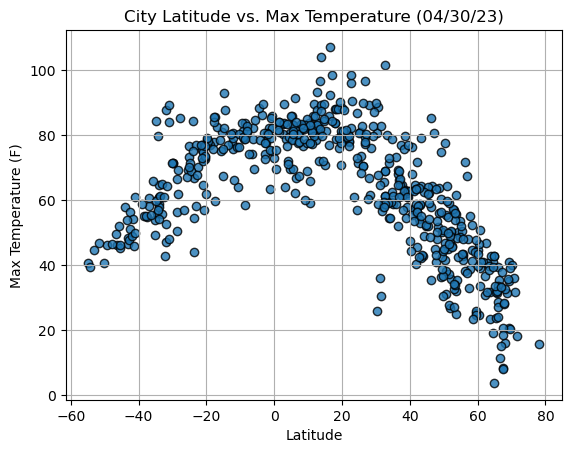

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

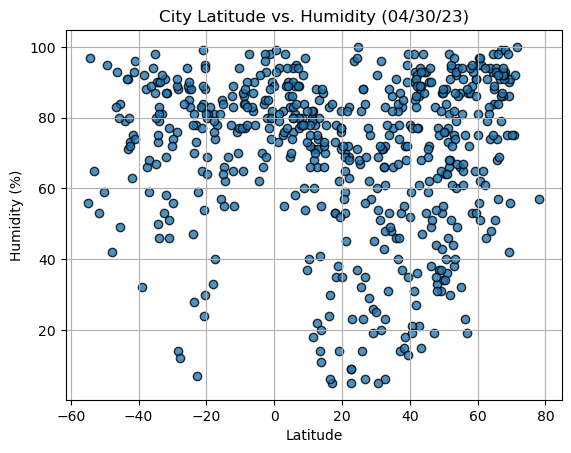

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

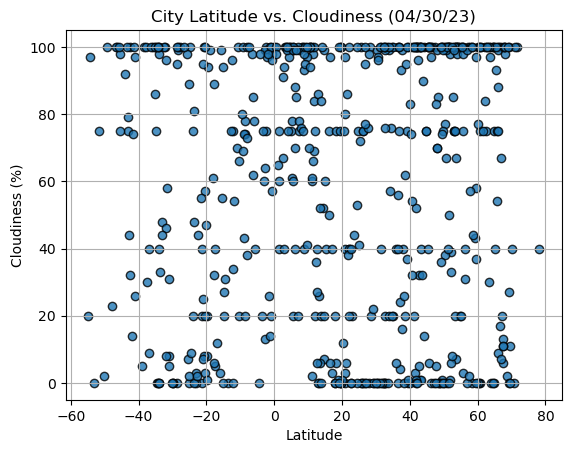

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

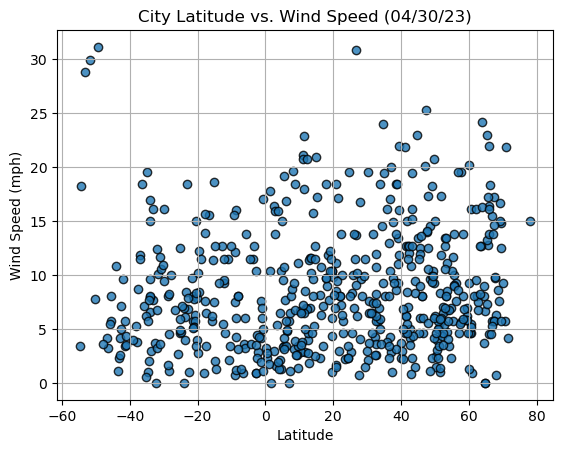

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,khabary,53.6259,79.5345,32.02,60,7,6.76,RU,1682883915
3,polyarnyy,69.1989,33.4478,35.08,86,100,16.64,RU,1682883915
4,manaure,11.7751,-72.4445,89.51,60,69,8.52,CO,1682883915
6,albany,42.6001,-73.9662,54.30,86,100,5.01,US,1682883916
8,yellowknife,62.4560,-114.3525,46.92,46,75,8.05,CA,1682883641


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mahina,-17.5065,-149.4890,85.77,74,40,3.44,PF,1682883914
2,quellon,-43.1167,-73.6167,48.45,71,75,2.30,CL,1682883915
5,port-aux-francais,-49.3500,70.2167,46.27,95,100,31.14,TF,1682883916
7,invercargill,-46.4000,168.3500,46.22,93,100,3.27,NZ,1682883916
10,waitangi,-43.9535,-176.5597,57.81,79,92,10.87,NZ,1682883917


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7053301352810927


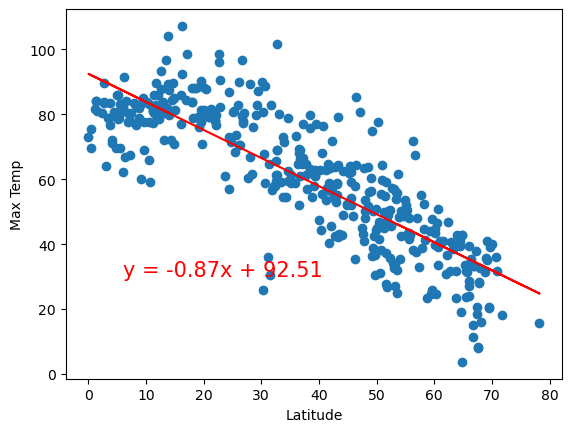

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-value is: 0.5994819031047705


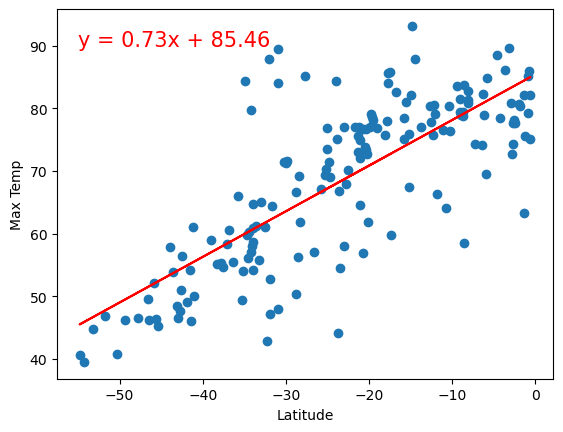

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

**Discussion about the linear relationship:** The northern Hem goes from 0 to 80 from the equator up and it goes from hot to cold and the southern hem does the opposite. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.011071685398035089


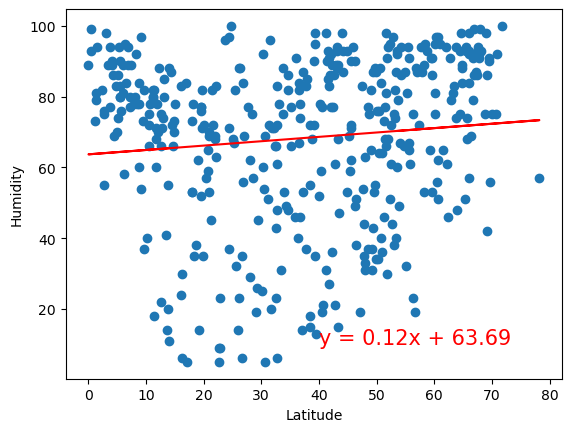

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-value is: 0.016929950641865726


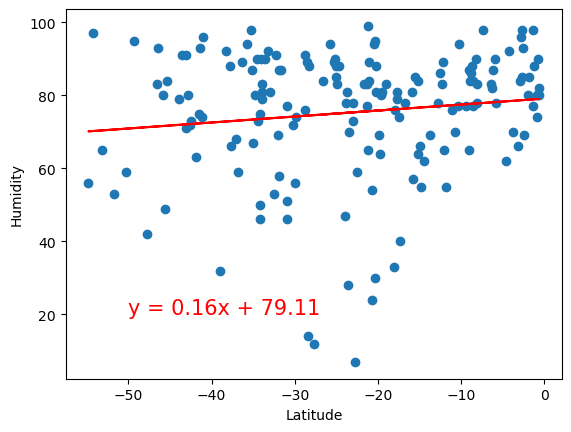

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

**Discussion about the linear relationship:** the line of regression is about the same for both the north and the south hem.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0002821311852509725


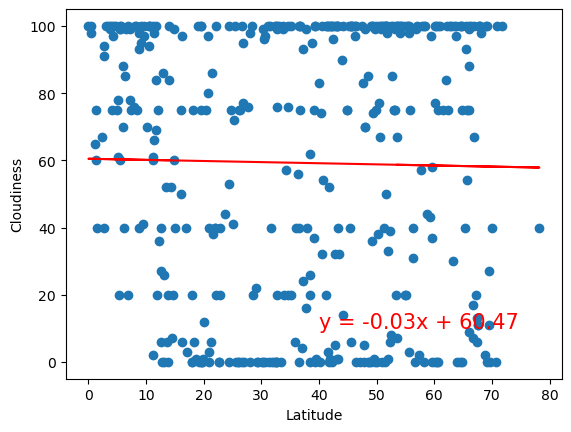

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-value is: 4.181710289046365e-06


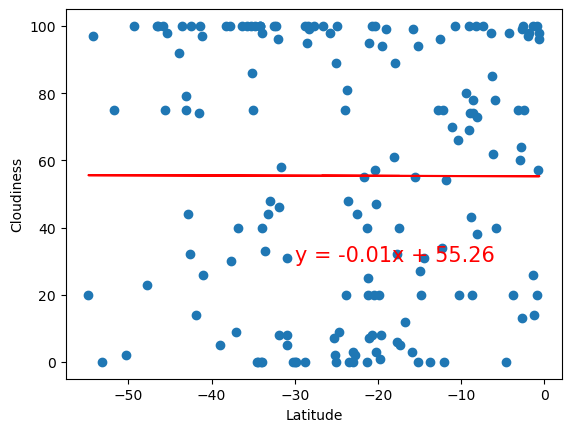

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** the north is slightly more cloudy.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.012006737378696352


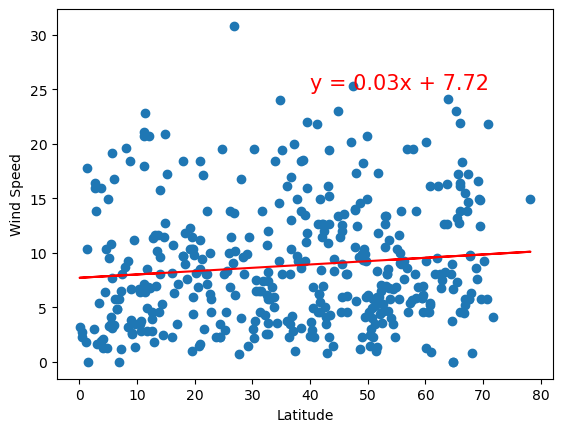

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-value is: 0.028285450055517174


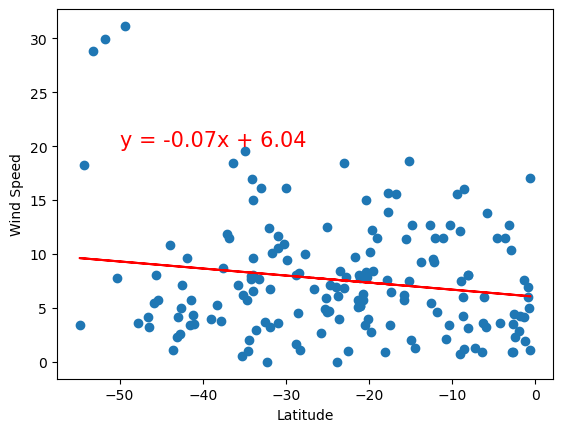

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))

**Discussion about the linear relationship:** North is slightly on point with the regression but one outlier, the south has more outliers outside of the regression.